# Modeling: Design organization

The ``Design`` instance creates a design project within the remote Geometry service to
complete all CAD modeling against.

You can organize all solid and surface bodies in each design within a customizable
component hierarchy. A component is simply an organization mechanism.

The top-level design node and each child component node can have one or more bodies assigned
and one or more components assigned.

The API requires each component of the design hierarchy to be given a user-defined name.

There are several design operations that result in a body being created within a design.
Executing each of these methods against a specific component instance explicitly specifies the
node of the design tree to place the new body under.

## Perform required imports

Perform the required imports.

In [1]:
from ansys.geometry.core import Modeler
from ansys.geometry.core.math import UNITVECTOR3D_X, Point2D
from ansys.geometry.core.misc import UNITS, Distance
from ansys.geometry.core.sketch import Sketch

## Organize design

Extrude two sketches to create bodies. Assign the cylinder to the
top-level design component. Assign the slot to the component nested
one level beneath the top-level design component.

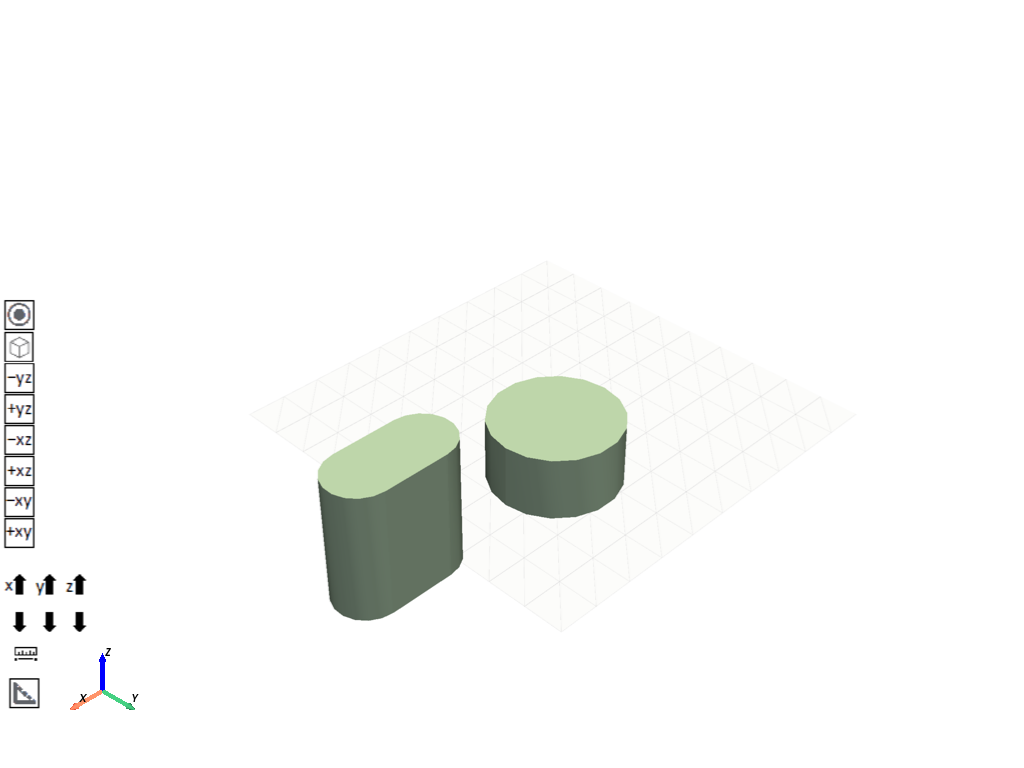

In [2]:
modeler = Modeler()

design = modeler.create_design("DesignHierarchyExample")

circle_sketch = Sketch()
circle_sketch.circle(Point2D([10, 10], UNITS.mm), Distance(10, UNITS.mm))

cylinder_body = design.extrude_sketch("10mmCylinder", circle_sketch, Distance(10, UNITS.mm))

slot_sketch = Sketch()
slot_sketch.slot(Point2D([40, 10], UNITS.mm), Distance(20, UNITS.mm), Distance(10, UNITS.mm))

nested_component = design.add_component("NestedComponent")
slot_body = nested_component.extrude_sketch("SlotExtrusion", slot_sketch, Distance(20, UNITS.mm))

design.plot()

## Create nested component

Create a component that is nested under the previously created component and then
create another cylinder from the previously used sketch.

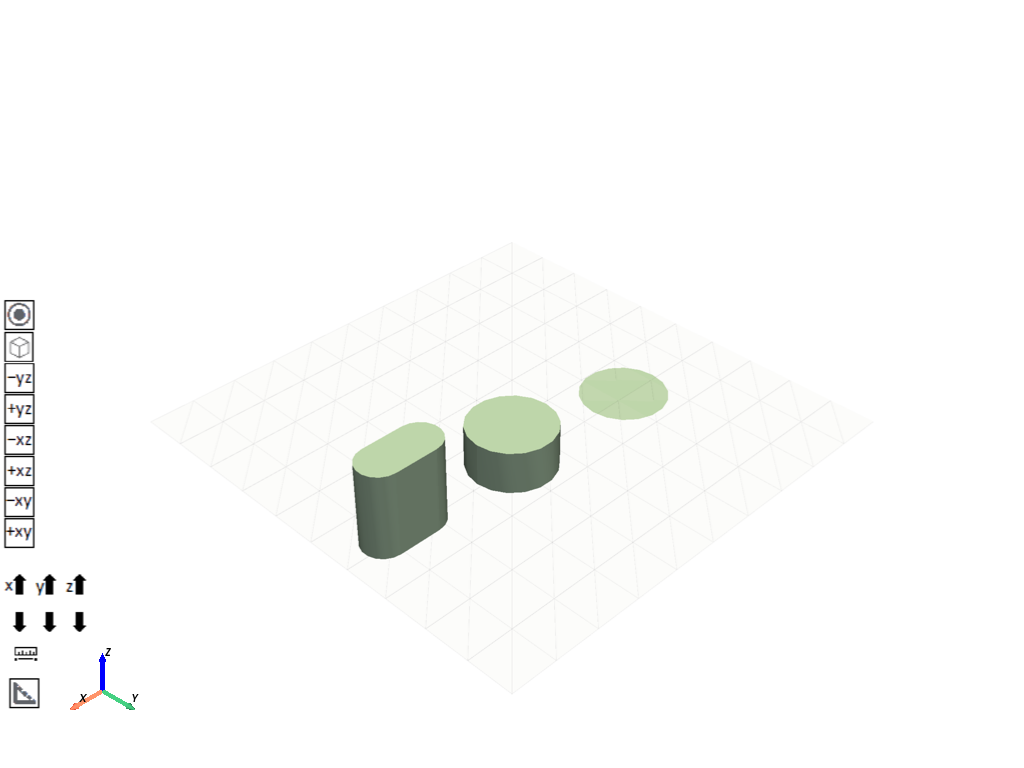

In [3]:
double_nested_component = nested_component.add_component("DoubleNestedComponent")

circle_surface_body = double_nested_component.create_surface("CircularSurfaceBody", circle_sketch)
circle_surface_body.translate(UNITVECTOR3D_X, Distance(-35, UNITS.mm))

design.plot()

## Use surfaces from body to create additional bodies

You can use surfaces from any body across the entire design as references for creating additional bodies.

Extrude a cylinder from the surface body assigned to the child component.

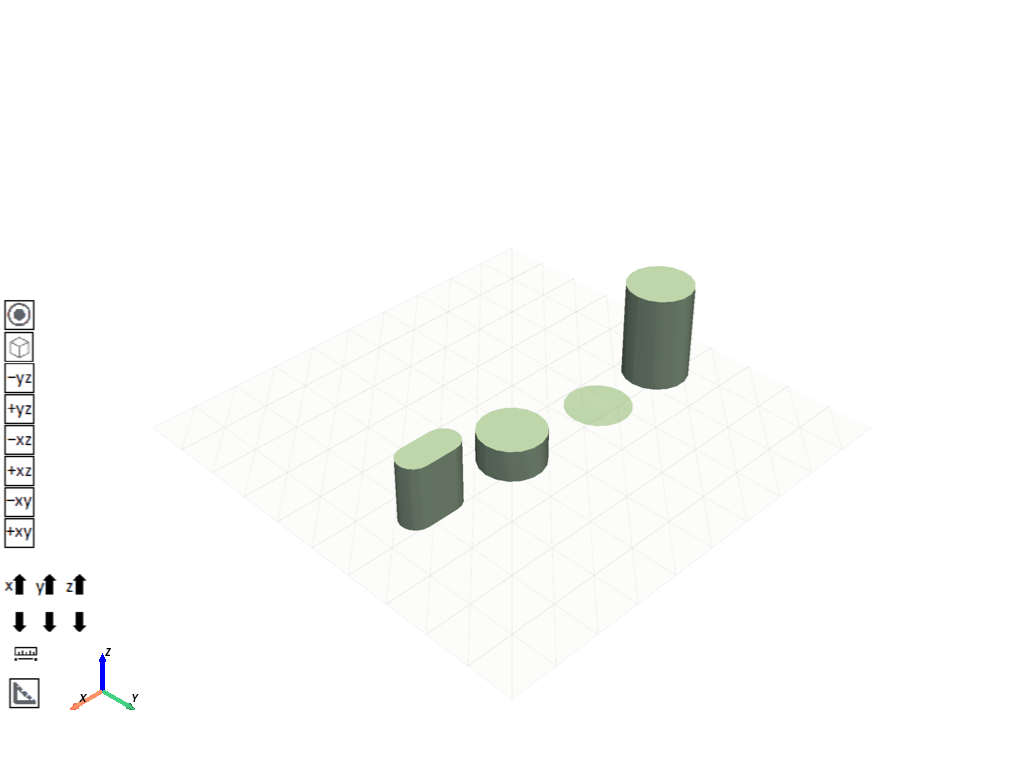

In [4]:
cylinder_from_face = nested_component.extrude_face("CylinderFromFace", circle_surface_body.faces[0], Distance(30, UNITS.mm))
cylinder_from_face.translate(UNITVECTOR3D_X, Distance(-25, UNITS.mm))

design.plot()